# Taller 2: operaciones de transformación del histograma

## Cargue la imagen quito.png y visualícela.

In [31]:
# Modificar ruta de las imágenes
PATH = './imagenes/'

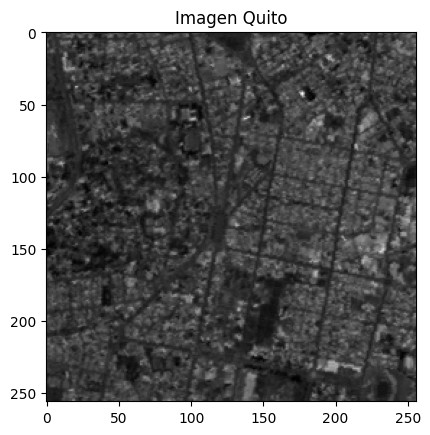

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen_quito = cv2.imread(PATH + 'QUITO.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(imagen_quito, cmap='gray')
plt.title('Imagen Quito')
plt.show()

## Visualice su histograma.

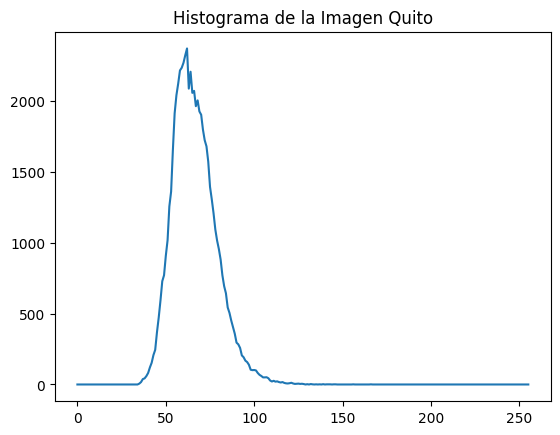

In [33]:
hist = cv2.calcHist([imagen_quito], [0], None, [256], [0, 256])
plt.plot(hist)
plt.title('Histograma de la Imagen Quito')
plt.show()

## Efectúe una ecualización del histograma, visualice la imagen resultado y su histograma. En este caso particular, ¿a qué se debe la discontinuidad del histograma ecualizado?

Utilizamos `cv2` para ecualizar el histograma.

In [34]:
imagen_quito_equ = cv2.equalizeHist(imagen_quito)

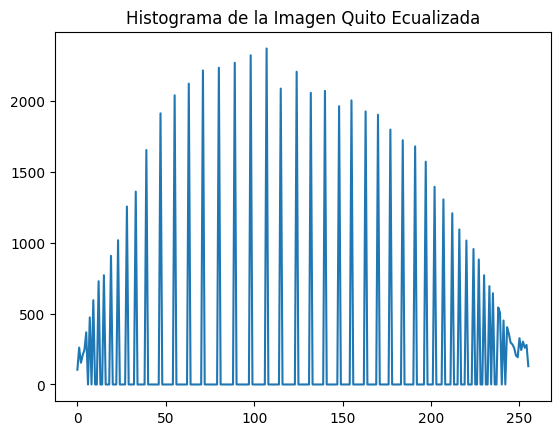

In [35]:
hist_ecua_quito = cv2.calcHist([imagen_quito_equ], [0], None, [256], [0, 256])
plt.plot(hist_ecua_quito)
plt.title('Histograma de la Imagen Quito Ecualizada')
plt.show()

Visualizamos el histograma luego de la ecualización y efectivamente se ve discontinuo. La razón por la que pasa esto es porque la ecualización mapea los niveles de intensidad de entrada a niveles de intesidad de salidad distintos. Cuando varios valores de entrada se mapean al mismo valor de salida, se crean saltos dejando algunos espacios vacíos. La ecualización usa la función de distribución acumulada para redistribuir intensidades. Como la función de distribución acumulada es una función escalonada en imágenes discretas, el mapeo resultante no es continuo sino que tiene saltos. Los valores de la función de transformación se redondean a enteros. Adicionalmente, podemos notar que el objetivo de uniformidad de la ecualización se nota en la imagen de QUITO. El histograma de la imagen original tiene un pico entre 35 y 160, mientras el histograma luego de la ecualización se distribuye de forma más pareja en el rango de 0 a 255.

## Efectúe una segunda vez esta operación. Es decir, aplique una ecualización del histograma a la imagen resultado del punto anterior. ¿Qué pasa? ¿Por qué?

In [36]:
imagen_quito_equ2 = cv2.equalizeHist(imagen_quito_equ)

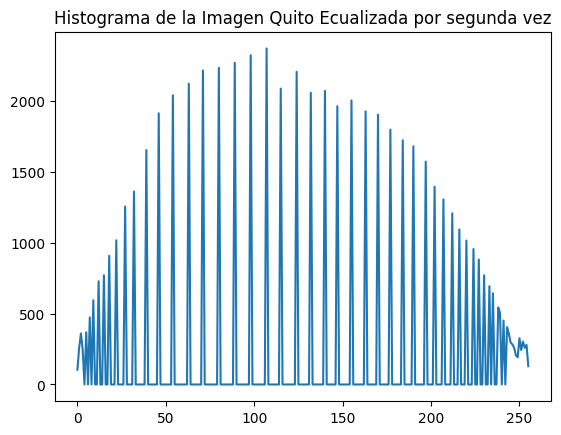

In [37]:
hist = cv2.calcHist([imagen_quito_equ2], [0], None, [256], [0, 256])
plt.plot(hist)
plt.title('Histograma de la Imagen Quito Ecualizada por segunda vez')
plt.show()

Al ecualizar por segunda vez, obtenemos un histograma casi idéntico al de la primera iteración. Vemos unos pequeños cambios, pero no son significativos como para tener un impacto visual en la gráfica. Después de la primera ecualización, ya se logró una distribución aproximadamente uniforme, dada la distribución de intensidad de la imagen. Ya se cumplió el objetivo y ecualizar nuevamente no cambia el resultado inicial.

## Repita las operaciones 1 a 4 con la imagen baboon.png. ¿Cómo es el resultado de esta transformación comparado con la ecualización de la imagen precedente (quito.png)? ¿Por qué?

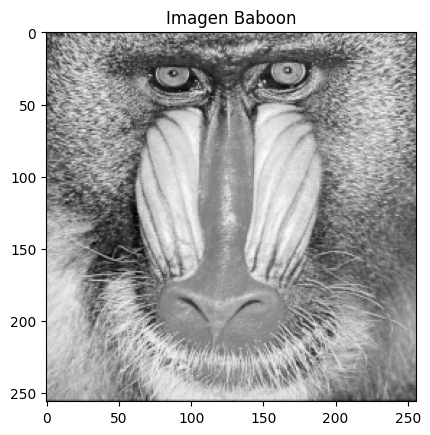

In [38]:
imagen_baboon = cv2.imread(PATH + 'baboon.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(imagen_baboon, cmap='gray')
plt.title('Imagen Baboon')
plt.show()

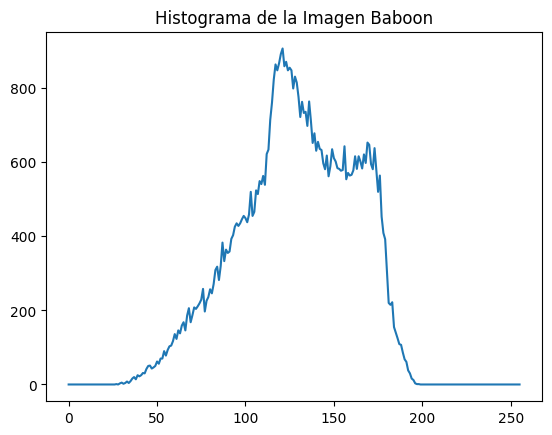

In [39]:
hist_baboon = cv2.calcHist([imagen_baboon], [0], None, [256], [0, 256])
plt.plot(hist_baboon)
plt.title('Histograma de la Imagen Baboon')
plt.show()

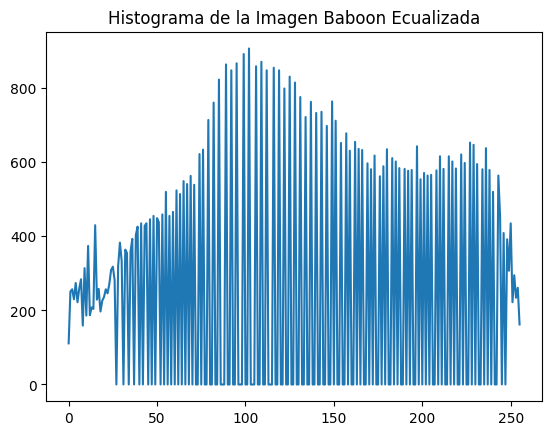

In [40]:
imagen_baboon_equ = cv2.equalizeHist(imagen_baboon)
hist_ecua_baboon = cv2.calcHist([imagen_baboon_equ], [0], None, [256], [0, 256])
plt.plot(hist_ecua_baboon)
plt.title('Histograma de la Imagen Baboon Ecualizada')
plt.show()

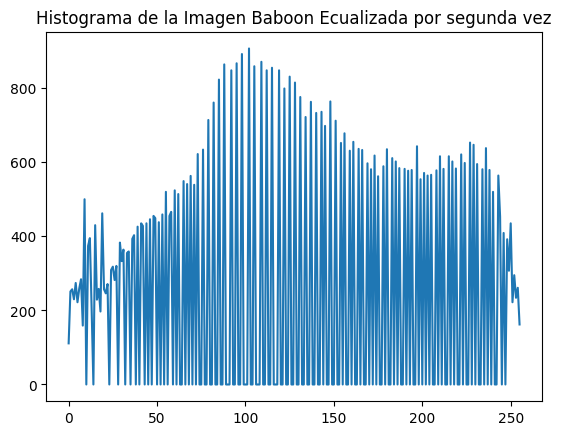

In [41]:
imagen_baboon_equ2 = cv2.equalizeHist(imagen_baboon_equ)
hist = cv2.calcHist([imagen_baboon_equ2], [0], None, [256], [0, 256])
plt.plot(hist)
plt.title('Histograma de la Imagen Baboon Ecualizada por segunda vez')
plt.show()

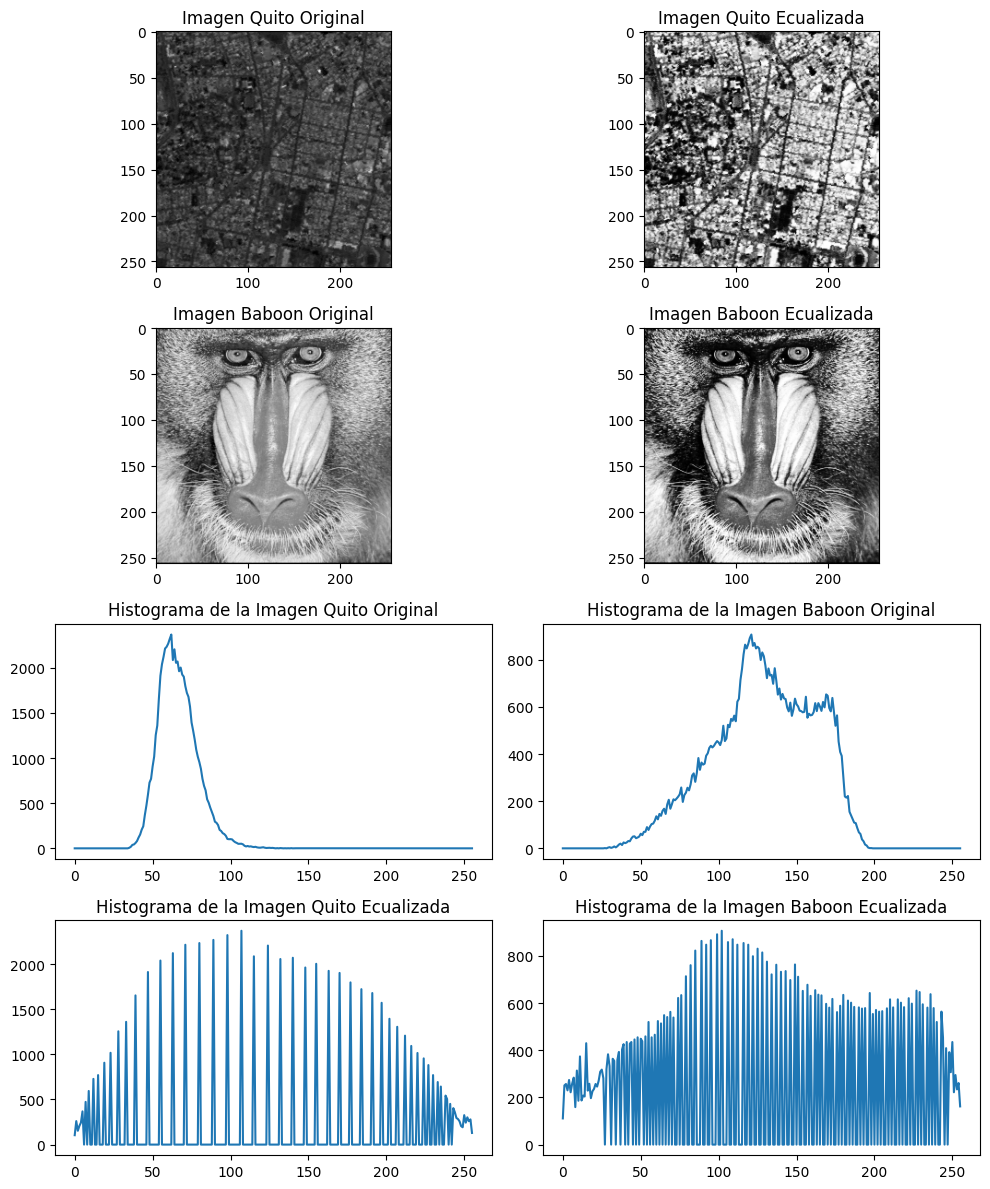

In [ ]:
hist_quito = cv2.calcHist([imagen_quito], [0], None, [256], [0, 256])
hist_baboon = cv2.calcHist([imagen_baboon], [0], None, [256], [0, 256])

fig, axs = plt.subplots(4, 2, figsize=(10, 12))
axs[0, 0].imshow(imagen_quito, cmap='gray')
axs[0, 0].set_title('Imagen Quito Original')
axs[0, 1].imshow(imagen_quito_equ, cmap='gray')
axs[0, 1].set_title('Imagen Quito Ecualizada')
axs[1, 0].imshow(imagen_baboon, cmap='gray')
axs[1, 0].set_title('Imagen Baboon Original')
axs[1, 1].imshow(imagen_baboon_equ, cmap='gray')
axs[1, 1].set_title('Imagen Baboon Ecualizada')
axs[2, 0].plot(hist_quito)
axs[2, 0].set_title('Histograma de la Imagen Quito Original')
axs[2, 1].plot(hist_baboon)
axs[2, 1].set_title('Histograma de la Imagen Baboon Original')
axs[3, 0].plot(hist_ecua_quito)
axs[3, 0].set_title('Histograma de la Imagen Quito Ecualizada')
axs[3, 1].plot(hist_ecua_baboon)
axs[3, 1].set_title('Histograma de la Imagen Baboon Ecualizada')
plt.tight_layout()
plt.show()

El resultado de la ecualización en Baboon presenta diferencias respecto al de Quito. Estas se pueden notar en dos aspectos:

- A nivel estético, la ecualización mejora el contraste de forma mucho más evidente en la imagen de Baboon. Esto se debe a que resalta los detalles de la textura y le da mayor vivacidad a la imagen.

- A nivel de histograma, el de Baboon ecualizado tiene menos saltos que el de Quito ecualizado. Esto pasa porque la distribución de intensidad de Baboon tiene un rango más amplio, por lo que la ecualización mapea los valores originales a un mayor número de valores de salida.

Por otra parte, al ecualizar por segunda vez, en ambos casos notamos que no hay un cambio significativo en el histograma. Esto sucede porque después de la primera ecualización ya se logró una distribución aproximadamente uniforme y aplicar la operación nuevamente no produce cambios notables.